# Tujuan: Memprediksi Churn dengan berbagai model Machine Learning

In [1144]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [1145]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1146]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1147]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Tidak ada null

In [1148]:
df.shape

(7043, 21)

In [1149]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1151]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

### Tampak masih ada value kosong di kolom TotalCharges sehingga terdeteksi sebagai string

In [1152]:
# Mengubah value di kolom TotalCharges menjadi tipe data float
# Jika tidak bisa, maka ubah valuenya menjadi 0
for i in range(0, len(df['TotalCharges'])-1):
    try:
        df['TotalCharges'][i] = float(df['TotalCharges'][i])
    except:
        df['TotalCharges'][i] = 0
    

C:\Users\Nando\AppData\Local\Temp\ipykernel_18828\1912745922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][i] = float(df['TotalCharges'][i])
C:\Users\Nando\AppData\Local\Temp\ipykernel_18828\1912745922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][i] = 0


In [1153]:
# Ubah kolom TotalCharges menjadi float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [1154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Tampak bahwa feature TotalCharges sudah menjadi numerik

## Countplot setiap feature KATEGORIKAL dengan hue Churn

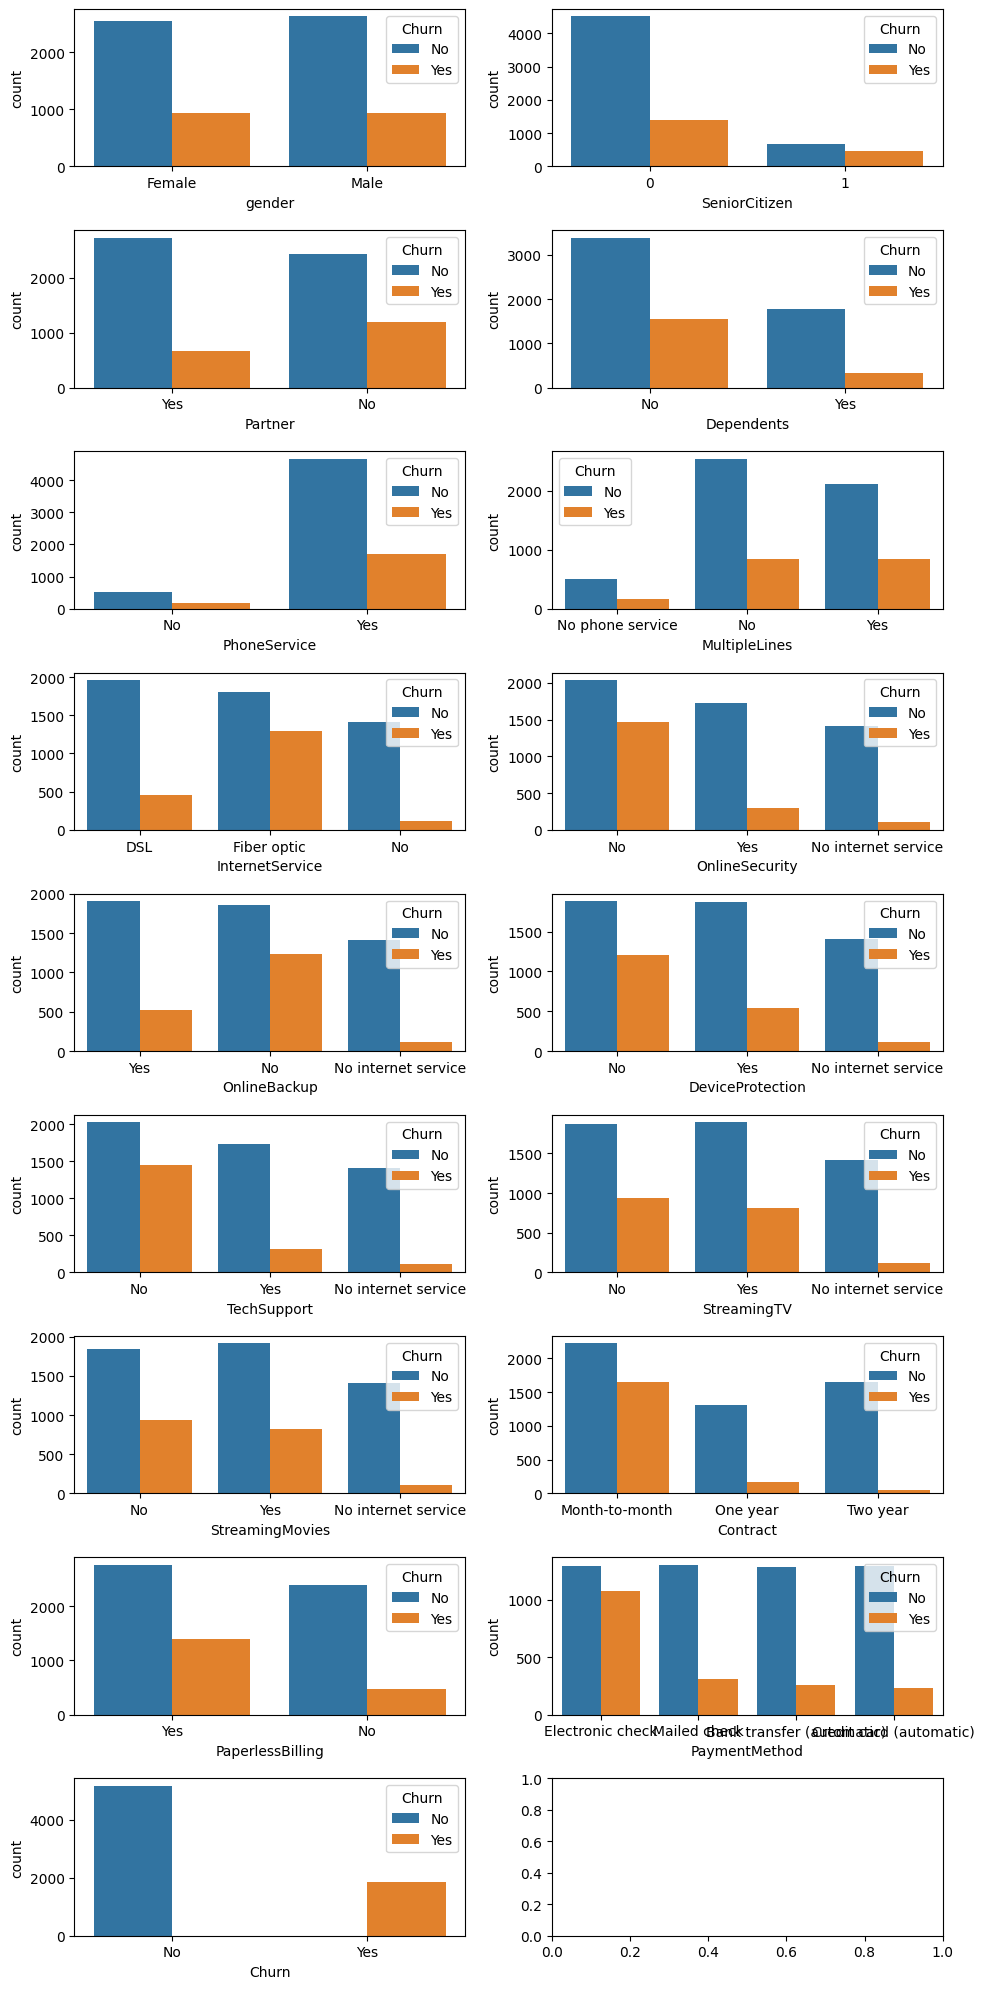

In [1155]:
catColumns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(10,20))

for idx, column in enumerate(catColumns):
    sns.countplot(data=df, x=column, hue='Churn', ax=axs[idx // 2, idx % 2])

plt.tight_layout()
plt.show()

# Histogram setiap feature NUMERIK

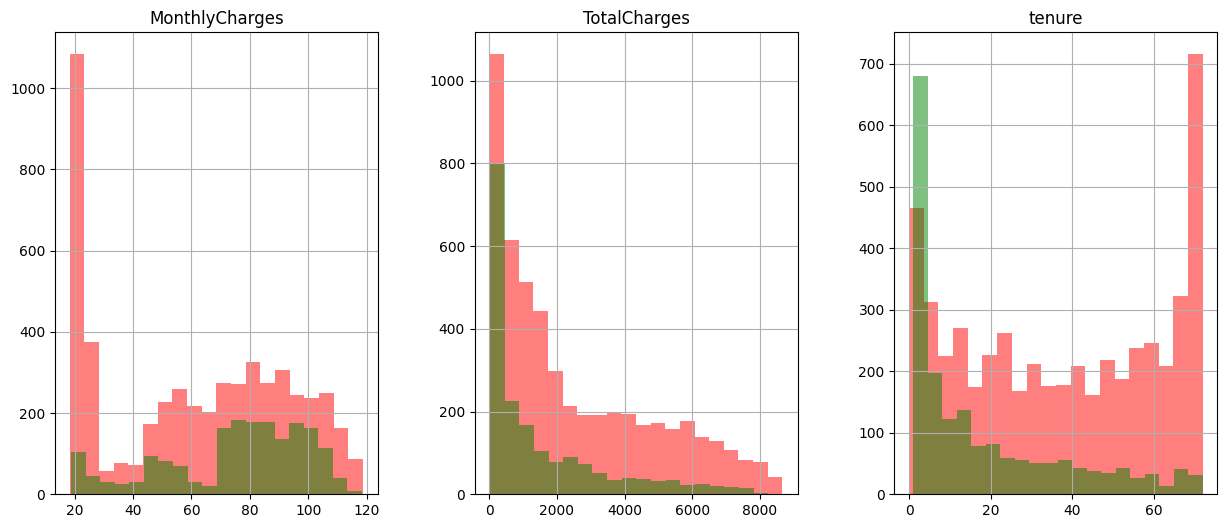

In [1156]:
numericColumns = ['MonthlyCharges', 'TotalCharges', 'tenure']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

df[df['Churn'] == 'No'][numericColumns].hist(bins = 20, color = 'red', alpha = 0.5, ax = ax)
df[df['Churn'] == 'Yes'][numericColumns].hist(bins = 20, color = 'green', alpha = 0.5, ax = ax)

plt.show()

In [1158]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Drop kolom yang tidak diperlukan

In [1159]:
df.drop('customerID', axis=1, inplace=True)

In [1160]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode Data

In [1161]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1162]:
dummies = ['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(data = df, columns = dummies, drop_first=True) 

### Ubah value dari kolom Churn menjadi 0 untuk 'No' dan 1 untuk 'Yes'

In [1163]:
churnLabel = {'No':0, 'Yes':1}

In [1164]:
df.replace({'Churn':churnLabel}, inplace=True)

In [1165]:
# df = df.loc[df['TotalCharges']!=0]

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

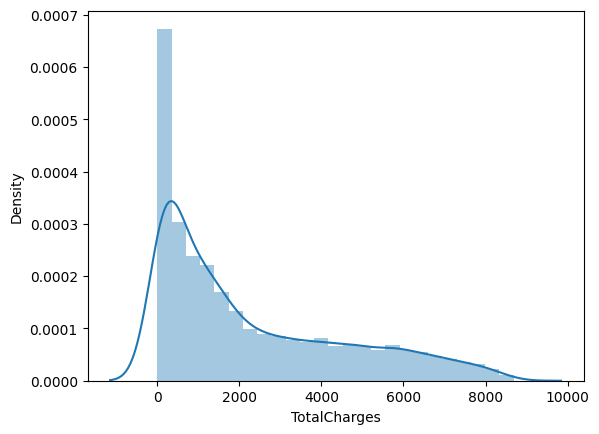

In [1166]:
sns.distplot(df['TotalCharges'])

### Tampak bahwa data tidak terdistribusi normal sehingga perlu dilakukan normalisasi

In [1167]:
# Melakukan normalisasi
normalisasi = ['TotalCharges', 'tenure']
df[normalisasi] = np.log1p(df[normalisasi])

In [1168]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.693147,29.85,3.429137,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,3.555348,56.95,7.544597,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1.098612,53.85,4.692723,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,3.828641,42.30,7.518471,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1.098612,70.70,5.028148,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Modelling

In [1119]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso,LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [1120]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

print(X.shape)
print(y.shape)

(7043, 30)
(7043,)


In [1121]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape

((5634, 30), (1409, 30))

In [1122]:
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())

In [1123]:
scoreTrainArr = []
scoreTestArr = []

# Fungsi untuk melakukan prediksi dan evaluasi hasil
def pred_model(model):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Training and Testing Score
    scoreTrain = model.score(X_train, y_train)
    scoreTest = model.score(X_test, y_test)
    
    scoreTrainArr.append(scoreTrain)
    scoreTestArr.append(scoreTest)
    
    print("Evaluasi Model Performance:")
    print("Training Accuracy :", scoreTrain)
    print("Testing Accuracy :", scoreTest)
    
    print("=====================================================")
    
    # Classification Report Training Model
    print("Classification report training model:")
    cr = classification_report(y_train, y_pred_train)
    print(cr)
    
    print("=====================================================")
    
    # Confussion Matrix
    confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('No churn', 'Churn'), ('No churn', 'Churn'))

    # Plot confusion matrix
    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title('Confusion Matrix for Training Model', fontsize=18, color='darkblue')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()
    
    print("=====================================================")
    
    # Accuracy Score and F1 Score
    print('Accuracy Score: ', accuracy_score(y_train,y_pred_train))
    print('F1 Score: ', f1_score(y_train,y_pred_train))
    
    print("=====================================================")
    
    print("\nClassification report testing model:")
    cr = classification_report(y_test, y_pred_test)
    print(cr)
    
    print("=====================================================")
    
    # Confussion Matrix
    confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('No churn', 'Churn'), ('No churn', 'Churn'))

    # Plot confusion matrix
    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title('Confusion Matrix for Training Model', fontsize=18, color='darkblue')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()
    
    print("=====================================================")
    
    # Accuracy Score and F1 Score
    print('Accuracy Score: ', accuracy_score(y_test,y_pred_test))
    print('F1 Score: ', f1_score(y_test,y_pred_test))

## Logistic Regression

Evaluasi Model Performance:
Training Accuracy : 0.8047568335108272
Testing Accuracy : 0.8282469836763662
Classification report training model:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4133
           1       0.67      0.53      0.59      1501

    accuracy                           0.80      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



c:\users\nando\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


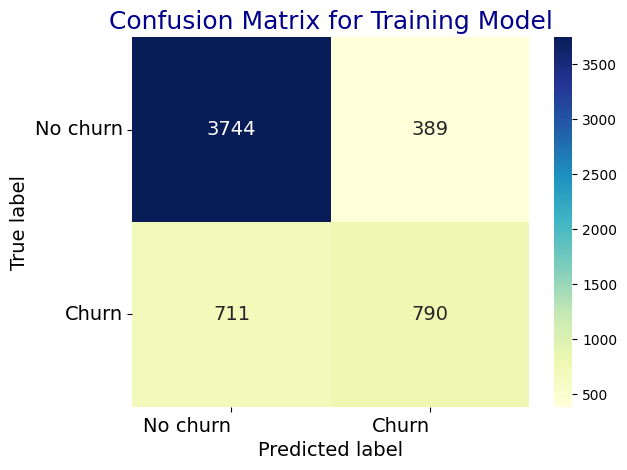

Accuracy Score:  0.8047568335108272
F1 Score:  0.5895522388059702

Classification report testing model:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1041
           1       0.72      0.56      0.63       368

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



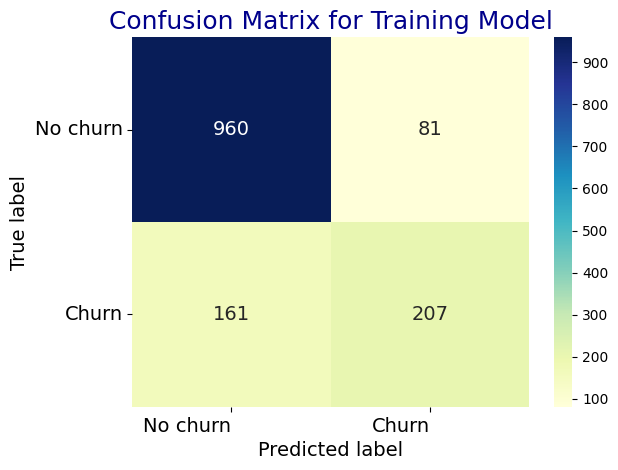

Accuracy Score:  0.8282469836763662
F1 Score:  0.6310975609756098


In [1124]:
logreg = LogisticRegression()
pred_model(logreg)

## Random Forest Classifier

Evaluasi Model Performance:
Training Accuracy : 0.9982250621228257
Testing Accuracy : 0.8140525195173882
Classification report training model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4133
           1       1.00      1.00      1.00      1501

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



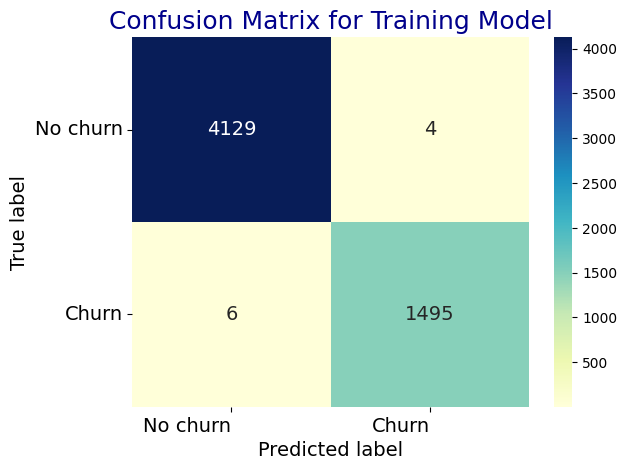

Accuracy Score:  0.9982250621228257
F1 Score:  0.9966666666666666

Classification report testing model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1041
           1       0.68      0.55      0.61       368

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



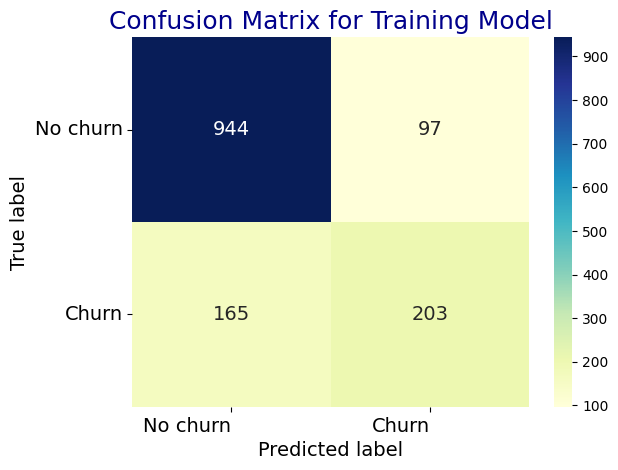

Accuracy Score:  0.8140525195173882
F1 Score:  0.6077844311377246


In [1125]:
rdf = RandomForestClassifier()
pred_model(rdf)

## Gradient Boosting Classifier

Evaluasi Model Performance:
Training Accuracy : 0.820376286829961
Testing Accuracy : 0.8218594748048261
Classification report training model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4133
           1       0.70      0.56      0.63      1501

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.75      5634
weighted avg       0.81      0.82      0.81      5634



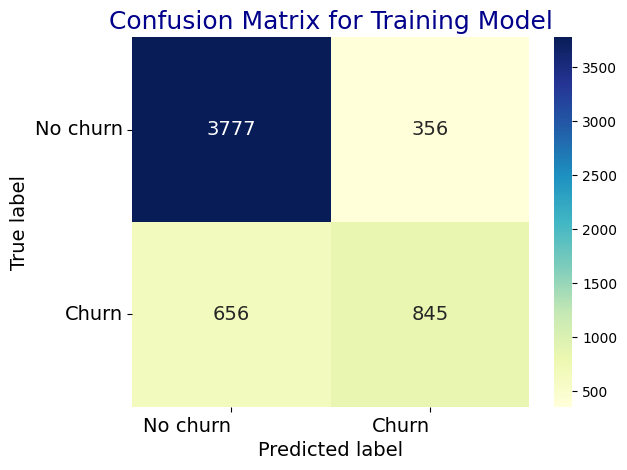

Accuracy Score:  0.820376286829961
F1 Score:  0.6254626202812731

Classification report testing model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1041
           1       0.70      0.56      0.62       368

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.81      0.82      0.82      1409



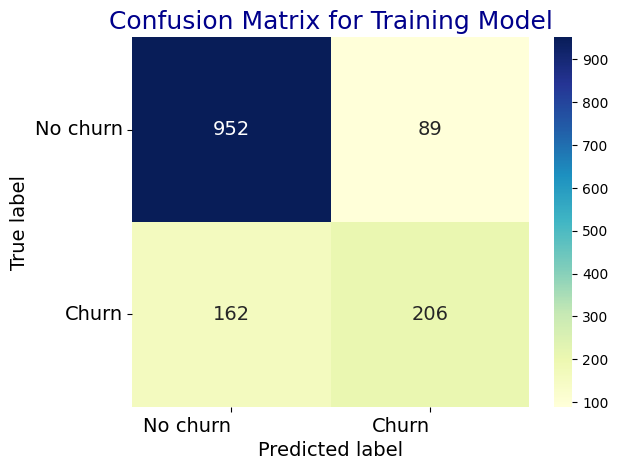

Accuracy Score:  0.8218594748048261
F1 Score:  0.6214177978883861


In [1126]:
gb = GradientBoostingClassifier()
pred_model(gb)

## Ada Boost Classifier

Evaluasi Model Performance:
Training Accuracy : 0.806354277600284
Testing Accuracy : 0.8275372604684174
Classification report training model:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4133
           1       0.67      0.54      0.60      1501

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



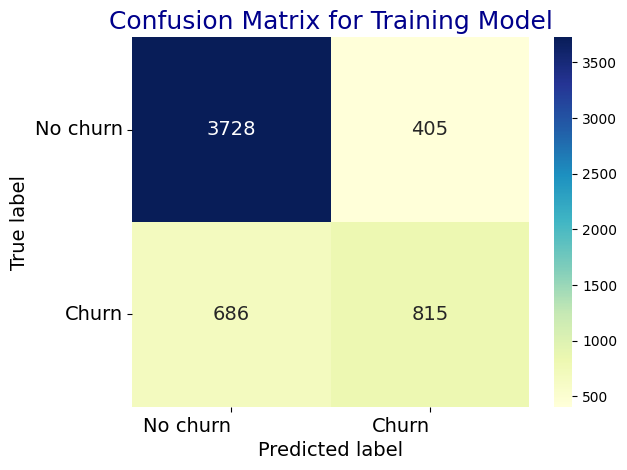

Accuracy Score:  0.806354277600284
F1 Score:  0.5990444689452408

Classification report testing model:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1041
           1       0.70      0.59      0.64       368

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



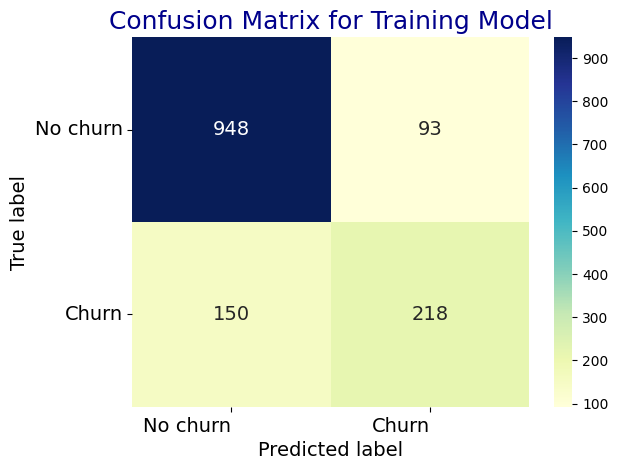

Accuracy Score:  0.8275372604684174
F1 Score:  0.6421207658321061


In [1127]:
ab = AdaBoostClassifier()
pred_model(ab)

## XGB Classifier

Evaluasi Model Performance:
Training Accuracy : 0.9323748668796592
Testing Accuracy : 0.794889992902768
Classification report training model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4133
           1       0.89      0.85      0.87      1501

    accuracy                           0.93      5634
   macro avg       0.92      0.91      0.91      5634
weighted avg       0.93      0.93      0.93      5634



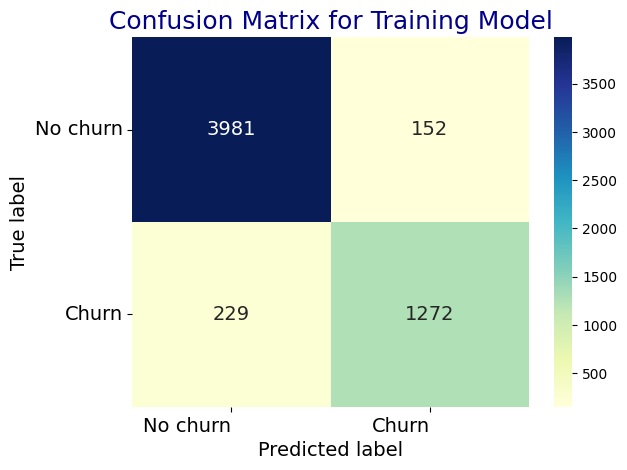

Accuracy Score:  0.9323748668796592
F1 Score:  0.8697435897435897

Classification report testing model:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.63      0.54      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



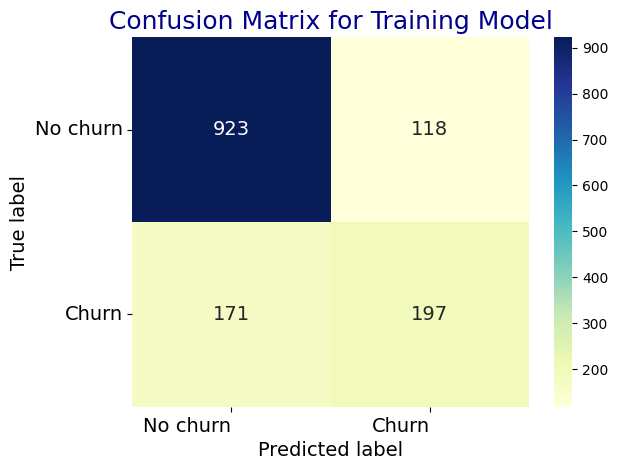

Accuracy Score:  0.794889992902768
F1 Score:  0.5768667642752563


In [1128]:
xgb = XGBClassifier()
pred_model(xgb)

In [1130]:
# Menampilkan skor semua model
model = ["LogisticRegression","RandomForestRegressor","GradientBoostingRegressor","AdaBoostClassifier","XGBoostClassifier"]
hasil = pd.DataFrame({'Model': model,'Accuracy Score(Train)': scoreTrainArr,'Accuracy Score(Test)': scoreTestArr})
display(hasil)

,Model,Accuracy Score(Train),Accuracy Score(Test)
0,LogisticRegression,0.804757,0.828247
1,RandomForestRegressor,0.998225,0.814053
2,GradientBoostingRegressor,0.820376,0.821859
3,AdaBoostClassifier,0.806354,0.827537
4,XGBoostClassifier,0.932375,0.794890


## Best Train Accuracy Score: Random Forest Regressor (0.99)
## Best Test Accuracy Score: Logistic Regression (0.83)